In [1]:
import Pkg; Pkg.add("FFTW")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed CategoricalArrays ─ v0.5.2
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [324d7699] ↑ CategoricalArrays v0.5.1 ⇒ v0.5.2


In [2]:
Fs = 1024;  
t = 0:1/(Fs-1):1;

x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)

1024-element Array{Float64,1}:
  0.0                  
  2.207021244212628    
 -1.3271388898696335   
  1.2533964120246632   
 -1.762901709938093    
 -0.6983641556218964   
  2.532063773598228    
 -1.258094993652871    
  1.0495632085008157   
 -1.2371701815227443   
 -1.3497121474756428   
  2.70889209238244     
 -1.045639160072822    
  ⋮                    
 -2.708892092382448    
  1.3497121474756923   
  1.2371701815226994   
 -1.0495632085007944   
  1.2580949936528594   
 -2.5320637735982467   
  0.698364155621943    
  1.7629017099380595   
 -1.253396412024654    
  1.3271388898696337   
 -2.207021244212651    
  3.928773447456944e-14

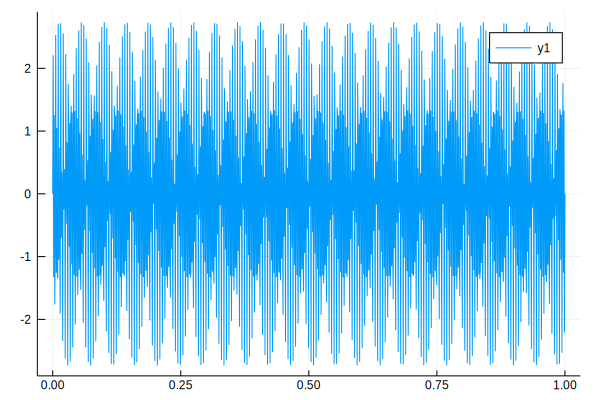

In [3]:
using Plots
plot(t,x)

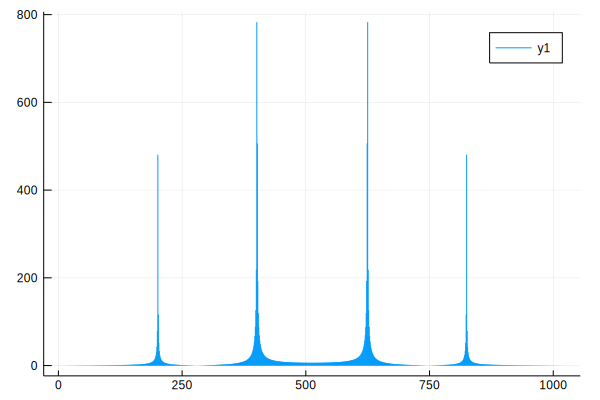

In [4]:
using FFTW
sticks((abs.(fft(x))))

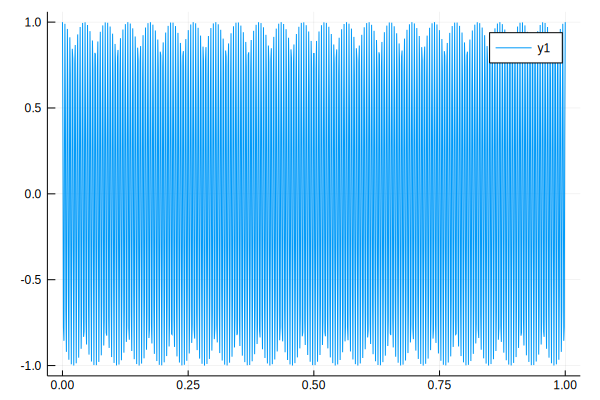

In [5]:
x = cos.(2*pi*t*200)
plot(t,x)

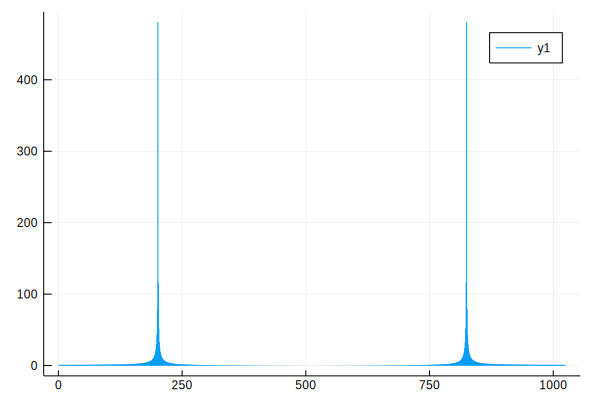

In [6]:
sticks((abs.(fft(x))))

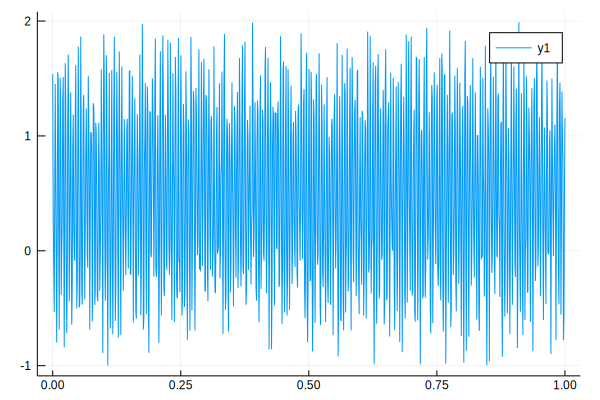

In [7]:
x = map(x -> x + rand(), x)
plot(t,x)

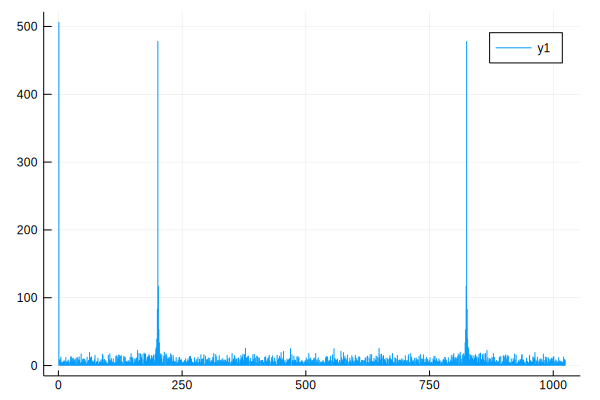

In [8]:
y = fft(x)
sticks((abs.(y)))

In [9]:
y = map(y -> abs(y) < 50 ? complex(0.0,0.0) : y, y)

1024-element Array{Complex{Float64},1}:
 506.3869754969372 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
                   ⋮      
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im
               0.0 + 0.0im

In [10]:
iy = ifft(y)

1024-element Array{Complex{Float64},1}:
    1.144906908105222 - 6.938893903907228e-18im 
  0.33769153217964437 + 9.020562075079397e-17im 
  -0.2632239481606042 + 4.0766001685454967e-17im
   0.1339207045314599 - 1.457167719820518e-16im 
    1.006418760727841 - 1.700029006457271e-16im 
     1.20497471954686 - 4.163336342344337e-17im 
   0.4674689956910796 + 4.85722573273506e-17im  
  -0.2350150953760495 + 8.586881206085195e-17im 
  0.02331040272251448 - 2.7755575615628914e-17im
   0.9029565306543288 - 1.1102230246251565e-16im
   1.2452288502257955 - 3.469446951953614e-17im 
   0.5983474824063401 + 1.6653345369377348e-16im
 -0.18624575589029274 + 1.448494102440634e-16im 
                      ⋮                         
   0.5124230208650009 - 6.591949208711867e-17im 
     1.22048934616721 - 3.9898639947466563e-17im
   0.9721502772950179 - 2.392021043046144e-18im 
  0.09504918555711311 + 1.960237527853792e-16im 
 -0.25554614908912665 + 1.474514954580286e-17im 
  0.38175077030157856 + 2.688

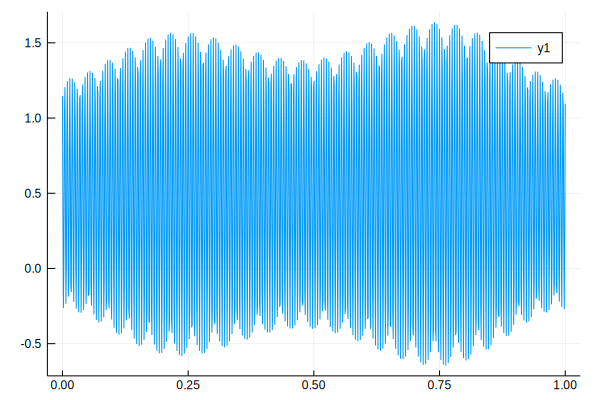

In [11]:
plot(t,real(iy))

In [12]:
import Pkg; Pkg.add("WAV")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [1]:
using Plots; using WAV; using FFTW

In [2]:
snd, sampFreq = wavread("yes-indeed.wav")
#sticks((abs.(fft(snd))))

([0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0], 48000.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x80, 0xbb, 0x00, 0x00, 0x00, 0xee, 0x02, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x53, 0x46, 0x54, 0x08, 0x00, 0x00, 0x00, 0x46, 0x69, 0x73, 0x73, 0x69, 0x6f, 0x6e, 0x00])])

In [3]:
wavplay(snd, sampFreq)

In [5]:
snd_f = fft(snd)

64065×2 Array{Complex{Float64},2}:
  -5.33226+5.66214e-15im  0.0+0.0im
  0.612077+0.137791im     0.0+0.0im
  0.274899+0.669061im     0.0+0.0im
  0.302315+0.439058im     0.0+0.0im
  0.347023+0.919794im     0.0+0.0im
  0.580467+0.325654im     0.0+0.0im
  -1.22565+1.0254im       0.0+0.0im
 -0.282282-0.465797im     0.0+0.0im
  -1.37169+1.11852im      0.0+0.0im
    4.5553-2.3539im       0.0+0.0im
   2.95828+0.044857im     0.0+0.0im
  -5.73631-0.373794im     0.0+0.0im
   2.15204+3.2734im       0.0+0.0im
          ⋮                        
   2.15204-3.2734im       0.0+0.0im
  -5.73631+0.373794im     0.0+0.0im
   2.95828-0.044857im     0.0+0.0im
    4.5553+2.3539im       0.0+0.0im
  -1.37169-1.11852im      0.0+0.0im
 -0.282282+0.465797im     0.0+0.0im
  -1.22565-1.0254im       0.0+0.0im
  0.580467-0.325654im     0.0+0.0im
  0.347023-0.919794im     0.0+0.0im
  0.302315-0.439058im     0.0+0.0im
  0.274899-0.669061im     0.0+0.0im
  0.612077-0.137791im     0.0+0.0im

In [6]:
y = map(y -> abs(y) < 50 ? complex(0.0,0.0) : y, snd_f)
wavplay(real(ifft(y)), sampFreq)

In [7]:
y = map(y -> abs(y) > 50 ? complex(0.0,0.0) : y, snd_f)
wavplay(real(ifft(y)), sampFreq)

In [8]:
y = map(y -> abs(y) > 10 && abs(y) < 120  ? complex(0.0,0.0) : y, snd_f)
wavplay(real(ifft(y)), sampFreq)